In [54]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pytz
import numpy as np

In [13]:
path_to_ch4_diffusive = 'CH4_diffusive.csv'
path_to_ch4_ebullitive = 'CH4_ebullitive.csv'
path_to_co2_diffusive = 'CO2_diffusive.csv'
path_to_co2_ebullitive = 'CO2_ebullitive.csv'

ch4_diffusive = pd.read_csv(path_to_ch4_diffusive, parse_dates=['datetime_start','datetime_end'])
ch4_ebullitive = pd.read_csv(path_to_ch4_ebullitive, parse_dates=['datetime_start','datetime_end'])
co2_diffusive = pd.read_csv(path_to_co2_diffusive, parse_dates=['datetime_start','datetime_end'])
co2_ebullitive = pd.read_csv(path_to_co2_ebullitive, parse_dates=['datetime_start','datetime_end'])

In [22]:
#ch4_diffusive['datetime_start'] = ch4_diffusive['datetime_start'].dt.tz_localize(pytz.timezone('Etc/GMT+8'))
#ch4_diffusive['datetime_start'] = ch4_diffusive['datetime_start'].dt.tz_convert(pytz.timezone('Etc/GMT+9'))
ch4_diffusive.columns

Index(['flux', 'chamber', 'pond', 'datetime_start', 'datetime_end',
       'slope_ppm_hr', 'n_obs_included_in_lm', 'r2', 'air_temp',
       'sur_wat_temp', 'umol_m2_hr', 'mmol_m2_hr', 'date', 'time', 'time24'],
      dtype='object')

In [65]:
ch4_diffusive.loc[ch4_diffusive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
ch4_diffusive['integ_time_hr'] = (ch4_diffusive['datetime_end'] - ch4_diffusive['datetime_start']).dt.total_seconds() / 3600
ch4_diffusive['umol_m2'] = ch4_diffusive['umol_m2_hr'] * ch4_diffusive['integ_time_hr']

ch4_diffusive['date'] = ch4_diffusive['datetime_end'].dt.date

ch4_diffusive_daily = ch4_diffusive.groupby(by=['pond', 'chamber', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                'umol_m2': lambda x: x.sum(skipna=False)
                                                }).reset_index()

ch4_diffusive_daily['umol_m2_d'] = ch4_diffusive_daily['umol_m2_hr'] * 24
ch4_diffusive_daily['mg_m2_d'] = ch4_diffusive_daily['umol_m2_d']*0.01604
ch4_diffusive_daily['mg_m2_d_v2'] = ch4_diffusive_daily['umol_m2']*0.01604

ch4_diffusive_daily_chamber_avg = ch4_diffusive_daily.groupby(by=['pond', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'mg_m2_d': 'mean', #mm
                                                }).reset_index()

In [60]:
ch4_ebullitive.columns

Index(['chamber', 'flux', 'datetime_start', 'datetime_end', 'sum_bubbles_ppm',
       'n_bubbles', 'flux_duration_hr', 'air_temp', 'sur_wat_temp',
       'bubbles_per_hr', 'ppm_per_hr', 'umol_m2_hr', 'mmol_m2_hr', 'pond',
       'date', 'time', 'time24'],
      dtype='object')

In [62]:
ch4_ebullitive.loc[ch4_ebullitive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
ch4_ebullitive['integ_time_hr'] = (ch4_ebullitive['datetime_end'] - ch4_ebullitive['datetime_start']).dt.total_seconds() / 3600
ch4_ebullitive['umol_m2'] = ch4_ebullitive['umol_m2_hr'] * ch4_ebullitive['integ_time_hr']

ch4_ebullitive['date'] = ch4_ebullitive['datetime_end'].dt.date

ch4_ebullitive_daily = ch4_ebullitive.groupby(by=['pond', 'chamber', 'date']).aggregate({ 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                'umol_m2': lambda x: x.sum(skipna=False)
                                                }).reset_index()

ch4_ebullitive_daily['umol_m2_d'] = ch4_ebullitive_daily['umol_m2_hr'] * 24
ch4_ebullitive_daily['mg_m2_d'] = ch4_ebullitive_daily['umol_m2_d']*0.01604
ch4_ebullitive_daily['mg_m2_d_v2'] = ch4_ebullitive_daily['umol_m2']*0.01604

In [ ]:
co2_diffusive.loc[co2_diffusive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
co2_diffusive['integ_time_hr'] = (co2_diffusive['datetime_end'] - co2_diffusive['datetime_start']).dt.total_seconds() / 3600
co2_diffusive['umol_m2'] = co2_diffusive['umol_m2_hr'] * co2_diffusive['integ_time_hr']

co2_diffusive['date'] = co2_diffusive['datetime_end'].dt.date

co2_diffusive_daily = co2_diffusive.groupby(by=['pond', 'chamber', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                'umol_m2': lambda x: x.sum(skipna=False)
                                                }).reset_index()

co2_diffusive_daily['umol_m2_d'] = co2_diffusive_daily['umol_m2_hr'] * 24
co2_diffusive_daily['mg_m2_d'] = co2_diffusive_daily['umol_m2_d']*0.01604
co2_diffusive_daily['mg_m2_d_v2'] = co2_diffusive_daily['umol_m2']*0.01604

co2_diffusive_daily_chamber_avg = co2_diffusive_daily.groupby(by=['pond', 'date']).aggregate({
                                                'slope_ppm_hr': 'mean',
                                                'r2': 'mean', 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'mg_m2_d': 'mean', #mm
                                                }).reset_index()

In [ ]:
co2_ebullitive.loc[co2_ebullitive['umol_m2_hr']<0, 'umol_m2_hr'] = np.nan
co2_ebullitive['integ_time_hr'] = (co2_ebullitive['datetime_end'] - co2_ebullitive['datetime_start']).dt.total_seconds() / 3600
co2_ebullitive['umol_m2'] = co2_ebullitive['umol_m2_hr'] * co2_ebullitive['integ_time_hr']

co2_ebullitive['date'] = co2_ebullitive['datetime_end'].dt.date

co2_ebullitive_daily = co2_ebullitive.groupby(by=['pond', 'chamber', 'date']).aggregate({ 
                                                'air_temp': 'mean', #C
                                                'sur_wat_temp': 'mean', #C
                                                'umol_m2_hr': 'mean', #mm
                                                'umol_m2': lambda x: x.sum(skipna=False)
                                                }).reset_index()

co2_ebullitive_daily['umol_m2_d'] = co2_ebullitive_daily['umol_m2_hr'] * 24
co2_ebullitive_daily['mg_m2_d'] = co2_ebullitive_daily['umol_m2_d']*0.01604
co2_ebullitive_daily['mg_m2_d_v2'] = co2_ebullitive_daily['umol_m2']*0.01604

In [40]:
ch4_diffusive_daily['pond'].unique()

array(['B', 'U'], dtype=object)

<Axes: xlabel='date', ylabel='mg_m2_d'>

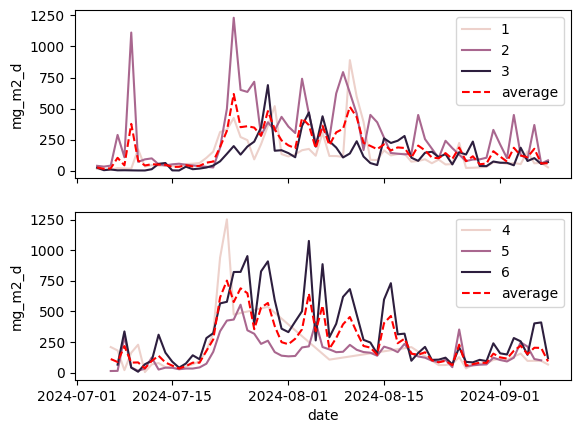

In [69]:
fig, axes=plt.subplots(2,1, sharex=True)
sns.lineplot(data=ch4_diffusive_daily.loc[ch4_diffusive_daily['pond']=='B'], x='date', y='mg_m2_d', hue='chamber', ax=axes[0])
sns.lineplot(data = ch4_diffusive_daily_chamber_avg.loc[ch4_diffusive_daily_chamber_avg['pond']=='B'], x='date', y='mg_m2_d', ax=axes[0], color='red', linestyle='--', label='average')

sns.lineplot(data=ch4_diffusive_daily.loc[ch4_diffusive_daily['pond']=='U'], x='date', y='mg_m2_d', hue='chamber', ax=axes[1])
sns.lineplot(data = ch4_diffusive_daily_chamber_avg.loc[ch4_diffusive_daily_chamber_avg['pond']=='U'], x='date', y='mg_m2_d', ax=axes[1], color='red', linestyle='--', label='average')

<Axes: xlabel='date', ylabel='mg_m2_d_v2'>

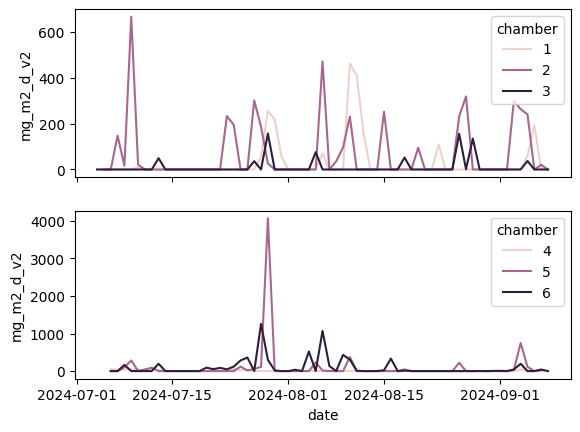

In [64]:
fig, axes=plt.subplots(2,1, sharex=True)
sns.lineplot(data=ch4_ebullitive_daily.loc[ch4_ebullitive_daily['pond']=='B'], x='date', y='mg_m2_d_v2', hue='chamber', ax=axes[0])

sns.lineplot(data=ch4_ebullitive_daily.loc[ch4_ebullitive_daily['pond']=='U'], x='date', y='mg_m2_d_v2', hue='chamber', ax=axes[1])

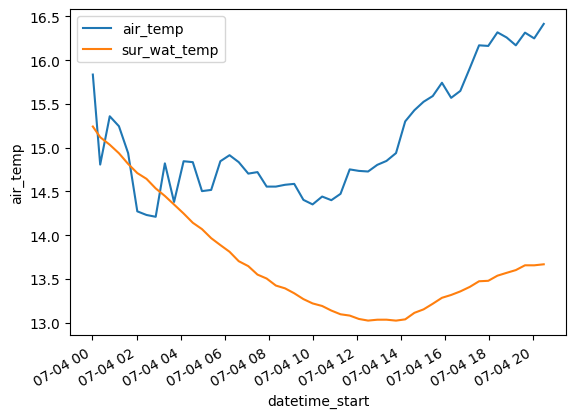

In [21]:
fig, axes=plt.subplots()
sns.lineplot(data=test, x='datetime_start', y='air_temp', label='air_temp')
sns.lineplot(data=test, x='datetime_start', y='sur_wat_temp', label='sur_wat_temp')
fig.autofmt_xdate()